In [ ]:
#!pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import shap

In [40]:
# Step 0: Load and Explore the Data
data_path = 'hemodat.csv'
data = pd.read_csv(data_path)

In [41]:
# Basic Data Exploration
print("Dataset Head:\n", data.head())
print("\nData Info:\n")
data.info()

Dataset Head:
    Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         61

- Reorders the columns of a DataFrame according to a specified list (new_order).

- Saves the reordered DataFrame to a CSV file (hemodat_reordered.csv).

- Prints a confirmation message and displays the reordered DataFrame.

In [42]:
# Specify the desired column order
new_order = [
    'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 
    'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Unnamed: 0'
]
# Reorder the columns
data_reordered = data[new_order]
#Save the rearranged DataFrame to a new CSV file
output_path = 'hemodat_reordered.csv'
data_reordered.to_csv(output_path, index=False)
print(f"Reordered file saved to {output_path}")

print(data_reordered)

Reordered file saved to hemodat_reordered.csv
          Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...    ...    ...   ...    ...   ...   
610    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66  3.63   
613    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   3.56  4.20   
614    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  Unna

In [43]:
print(data_reordered.head())

        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  Unnamed: 0  
0  12.1  69.0           1  
1  15.6  76.5           2  
2  33.2  79.3           3  
3  33.8  75.7           4  
4  29.9  68.7           5  


In [44]:
# Exploratory Data Analysis
print("Dataset Information:")
data_reordered.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    615 non-null    object 
 1   Age         615 non-null    int64  
 2   Sex         615 non-null    object 
 3   ALB         614 non-null    float64
 4   ALP         597 non-null    float64
 5   ALT         614 non-null    float64
 6   AST         615 non-null    float64
 7   BIL         615 non-null    float64
 8   CHE         615 non-null    float64
 9   CHOL        605 non-null    float64
 10  CREA        615 non-null    float64
 11  GGT         615 non-null    float64
 12  PROT        614 non-null    float64
 13  Unnamed: 0  615 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [45]:
print("\nSummary Statistics:")
print(data_reordered.describe(include='all'))


Summary Statistics:
             Category         Age  Sex         ALB         ALP         ALT  \
count             615  615.000000  615  614.000000  597.000000  614.000000   
unique              5         NaN    2         NaN         NaN         NaN   
top     0=Blood Donor         NaN    m         NaN         NaN         NaN   
freq              533         NaN  377         NaN         NaN         NaN   
mean              NaN   47.408130  NaN   41.620195   68.283920   28.450814   
std               NaN   10.055105  NaN    5.780629   26.028315   25.469689   
min               NaN   19.000000  NaN   14.900000   11.300000    0.900000   
25%               NaN   39.000000  NaN   38.800000   52.500000   16.400000   
50%               NaN   47.000000  NaN   41.950000   66.200000   23.000000   
75%               NaN   54.000000  NaN   45.200000   80.100000   33.075000   
max               NaN   77.000000  NaN   82.200000  416.600000  325.300000   

               AST         BIL         CHE

In [46]:
print("\nChecking for missing values:")
missing_values = data_reordered.isnull().sum()
print(missing_values)


Checking for missing values:
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
Unnamed: 0     0
dtype: int64


In [47]:
# Preprocessing and Imputation
# Fill missing numerical values with the mean
numerical_columns = data_reordered.select_dtypes(include=[np.number]).columns
data_reordered[numerical_columns] = data_reordered[numerical_columns].apply(
    lambda x: x.fillna(x.mean())
)

In [48]:
# Fill missing categorical values with the mode
categorical_columns = data_reordered.select_dtypes(include=['object']).columns
data_reordered[categorical_columns] = data_reordered[categorical_columns].apply(
    lambda x: x.fillna(x.mode()[0])
)

In [49]:
print("\nAfter Imputation, Checking for Missing Values:")
print(data_reordered.isnull().sum())


After Imputation, Checking for Missing Values:
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
Unnamed: 0    0
dtype: int64


Imputation Method:

- Evaluates the imputation strategy for numerical columns:
    - For each numerical column, it uses a SimpleImputer to replace missing values with the column mean.
    - The quality of the imputation is assessed using the Mean Absolute Error (MAE) between the imputed and original test values.

- Saves the final preprocessed dataset (data_reordered) to a CSV file.

In [50]:
# Evaluate imputation for numerical features
for col in numerical_columns:
    original_data = data_reordered[col].dropna()
    if len(original_data) > 0:
        train, test = train_test_split(original_data, test_size=0.2, random_state=42)
        imputer = SimpleImputer(strategy='mean')
        imputer.fit(train.values.reshape(-1, 1))
        imputed_test = imputer.transform(test.values.reshape(-1, 1))
        mae = mean_absolute_error(test, imputed_test)
        print(f"Feature: {col}, Mean Absolute Error of Imputation: {mae}")

# Save the preprocessed and imputed data
output_path = 'hemodat_preprocessed.csv'
data_reordered.to_csv(output_path, index=False)

print(f"Preprocessed file saved to {output_path}")

Feature: Age, Mean Absolute Error of Imputation: 0.0
Feature: ALB, Mean Absolute Error of Imputation: 0.0
Feature: ALP, Mean Absolute Error of Imputation: 0.0
Feature: ALT, Mean Absolute Error of Imputation: 0.0
Feature: AST, Mean Absolute Error of Imputation: 0.0
Feature: BIL, Mean Absolute Error of Imputation: 0.0
Feature: CHE, Mean Absolute Error of Imputation: 0.0
Feature: CHOL, Mean Absolute Error of Imputation: 0.0
Feature: CREA, Mean Absolute Error of Imputation: 0.0
Feature: GGT, Mean Absolute Error of Imputation: 0.0
Feature: PROT, Mean Absolute Error of Imputation: 0.0
Feature: Unnamed: 0, Mean Absolute Error of Imputation: 0.0
Preprocessed file saved to hemodat_preprocessed.csv


In [51]:
# Identify and Handle Non-Numeric Columns
non_numeric_cols = data.select_dtypes(include=['object']).columns
print("\nNon-Numeric Columns:\n", non_numeric_cols)


Non-Numeric Columns:
 Index(['Category', 'Sex'], dtype='object')


Here i identify the Non-Numeric cloumns and transfer in Numeric cloumns because the data is not being visualize. So we transfer data into the Numeric data and then visualize.

In [52]:
# Convert Non-Numeric Columns to Numeric using Encoding
for col in non_numeric_cols:
    data[col] = pd.factorize(data[col])[0]

<Figure size 1200x600 with 0 Axes>

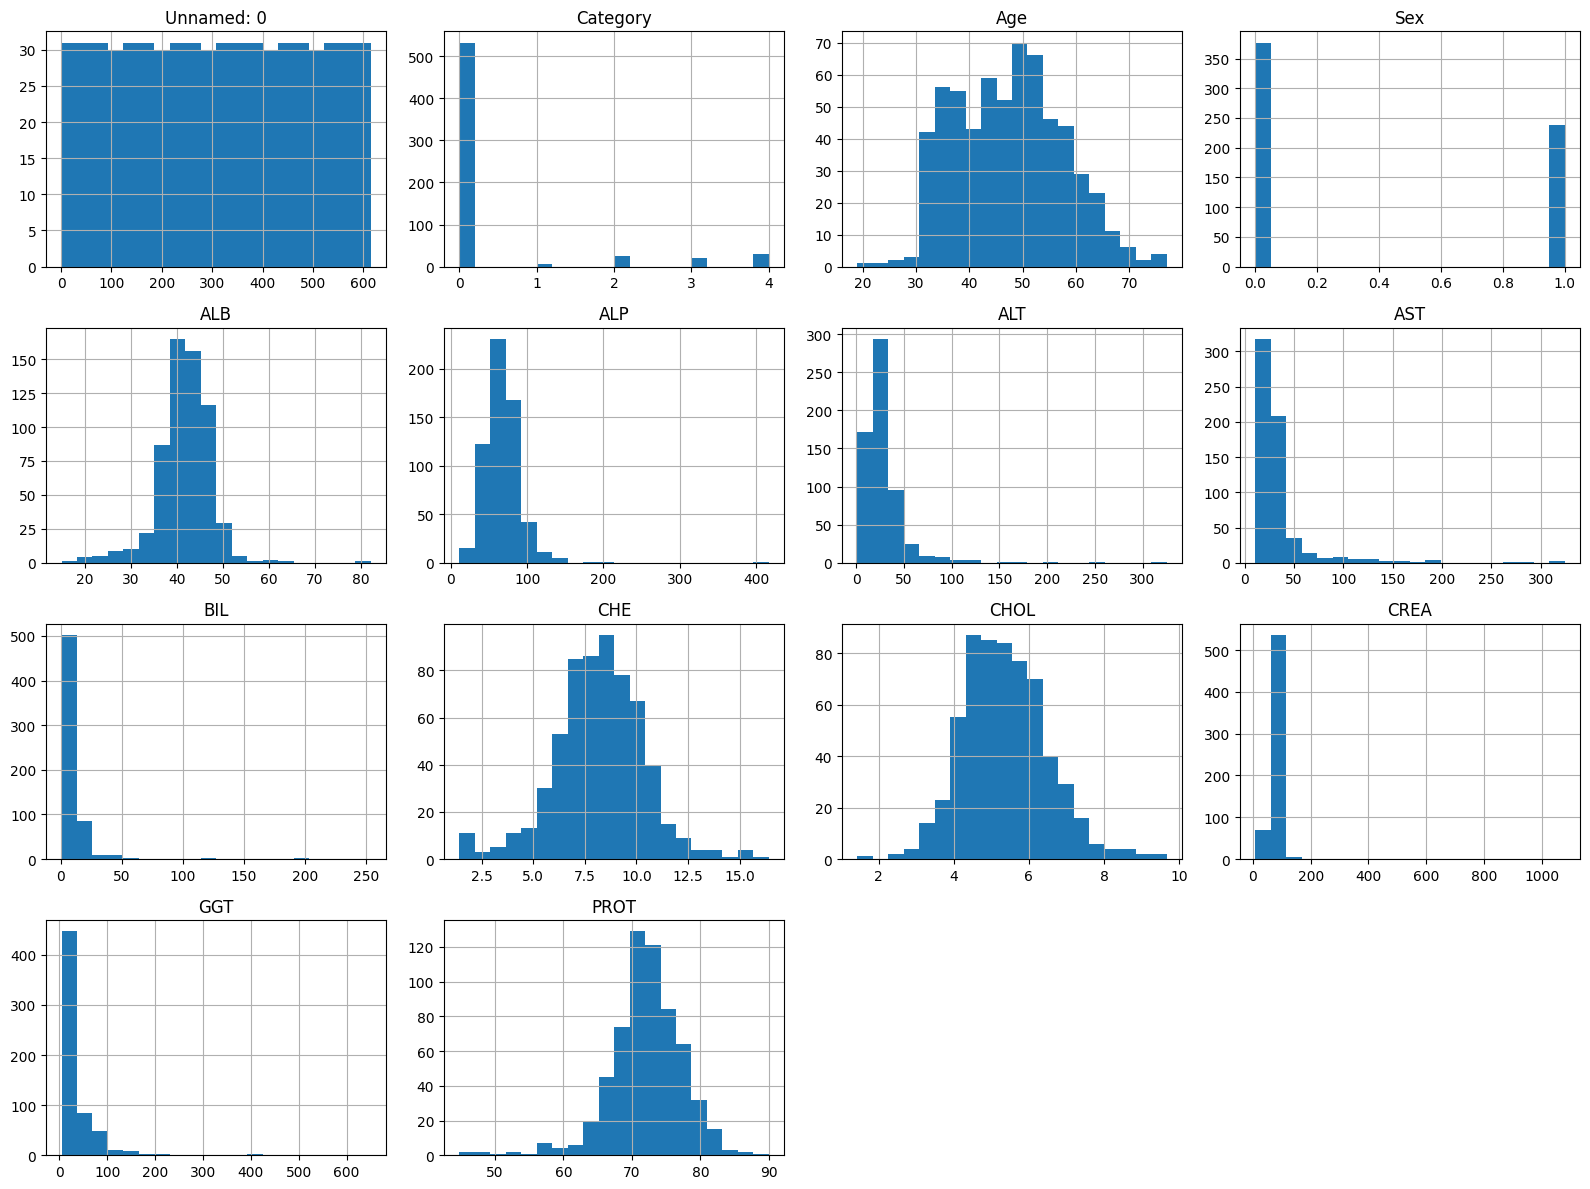

In [53]:
# Visualize Data Distribution
plt.figure(figsize=(12, 6))
data.hist(bins=20, figsize=(16, 12), layout=(4, 4))
plt.tight_layout()
plt.show()

Here we handle the missing values to impute data and visualize it.

In [54]:
# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [55]:
# Evaluate Imputation
missing_cols = data.columns[data.isnull().any()]
imputed_accuracy = {}
for col in missing_cols:
    original_values = data[col].dropna()
    mask = data[col].isnull()
    imputed_values = data_imputed.loc[mask, col]
    error = np.abs(original_values.mean() - imputed_values.mean())
    imputed_accuracy[col] = error
print("\nImputation Errors:\n", imputed_accuracy)


Imputation Errors:
 {'ALB': np.float64(0.0), 'ALP': np.float64(0.0), 'ALT': np.float64(0.0), 'CHOL': np.float64(8.881784197001252e-16), 'PROT': np.float64(0.0)}


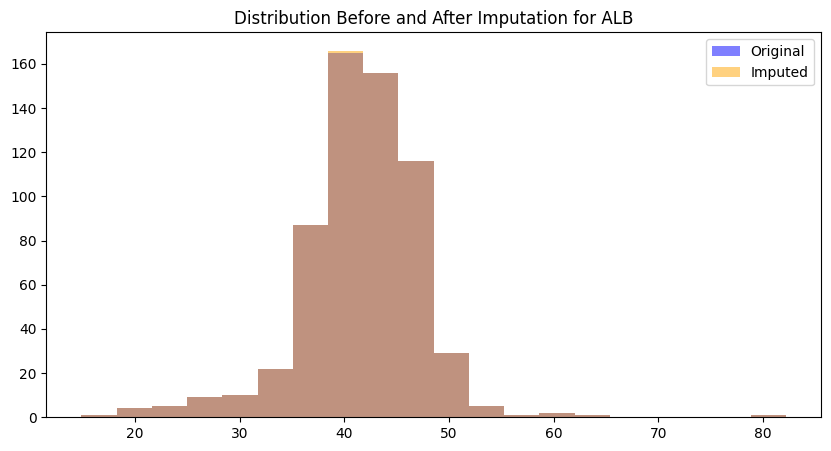

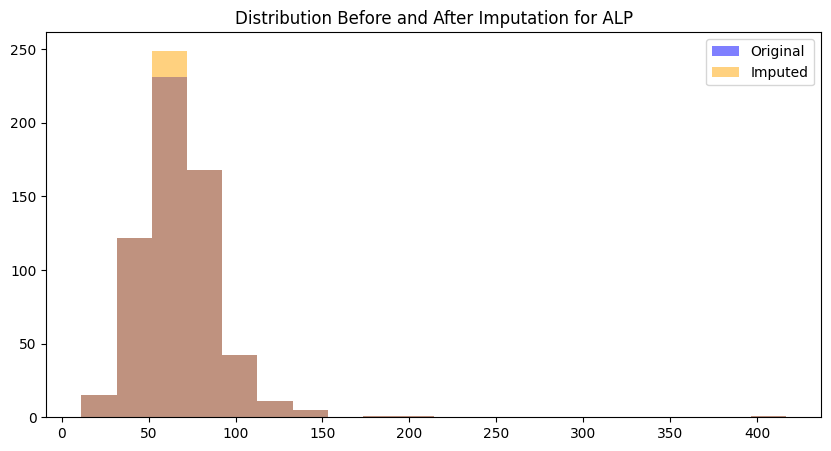

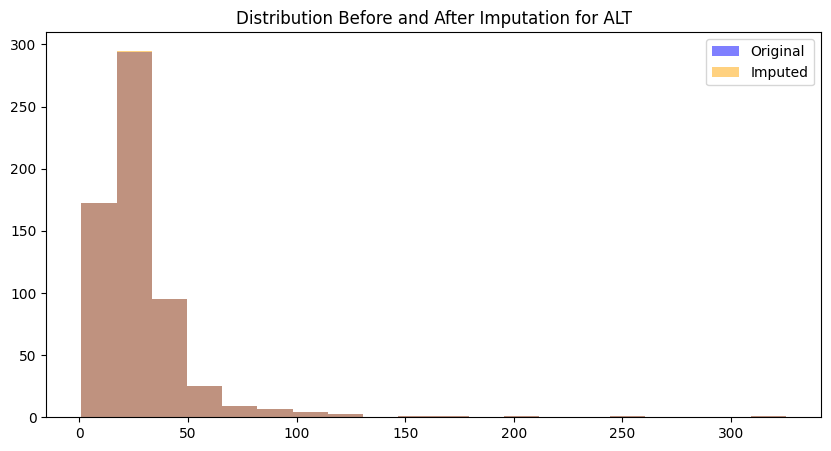

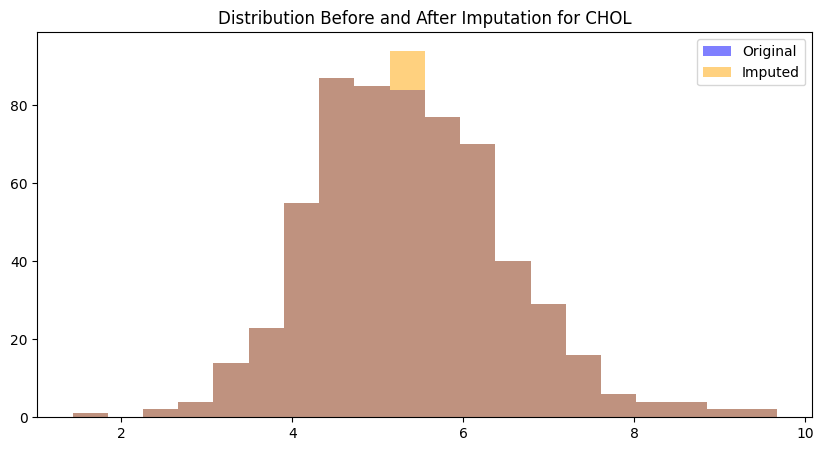

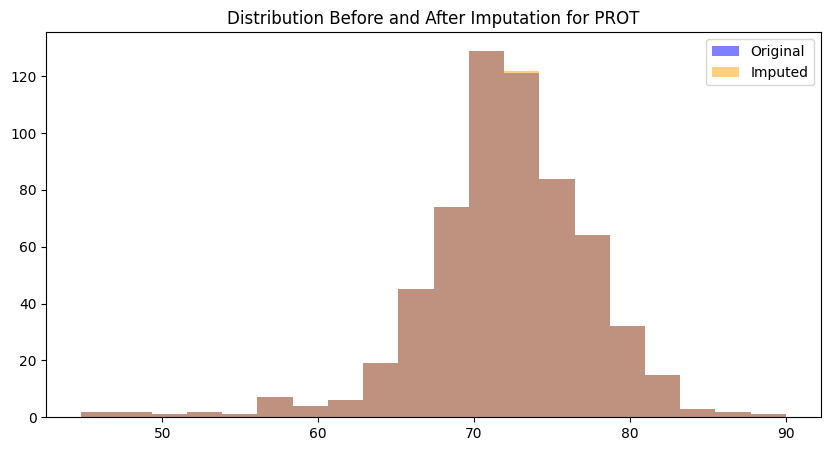

In [56]:
# Visualize Imputation Results
for col in missing_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, label='Original', color='blue')
    plt.hist(data_imputed[col], bins=20, alpha=0.5, label='Imputed', color='orange')
    plt.title(f"Distribution Before and After Imputation for {col}")
    plt.legend()
    plt.show()

In [57]:
print(data_imputed.columns)

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


- Here we load the preprocessed data to make the anomoly detection.

In [58]:
# File path for the preprocessed data
file_path = 'hemodat_preprocessed.csv'

# Load the preprocessed data
data_preprocessed = pd.read_csv(file_path)

Anomoly Detection:

- Purpose: This code trains an anomaly detection model (IsolationForest) to identify abnormal donor data.

- Training: Uses valid donor data ('0=Blood Donor') as a baseline for what "normal" looks like.

- Prediction: Flags anomalies in the entire dataset and evaluates how well these align with donors labeled as having medical conditions.

- Key Features: Scales data, trains on valid donors, and evaluates performance against labeled medical conditions.

In [59]:
# Step 1: Anomaly Detection
valid_donors = data_preprocessed[data_preprocessed['Category'] == '0=Blood Donor']

features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
X_valid = valid_donors[features]
X_valid = (X_valid - X_valid.mean()) / X_valid.std()  # Standardize the data

# Train the anomaly detector
anomaly_detector = IsolationForest(contamination=0.05, random_state=42)
anomaly_detector.fit(X_valid)

# Now, predict anomaly scores for all the data (excluding 'Category' and 'Anomaly')
X_all = data_preprocessed[features]
X_all = (X_all - X_all.mean()) / X_all.std()  # Standardize the data
predictions = anomaly_detector.predict(X_all)
data_preprocessed['Anomaly'] = predictions  # -1 for anomaly, 1 for normal 

# Evaluate accuracy on donors with medical conditions
actual_labels = (data_preprocessed['Category'] != '0=Blood Donor').astype(int)  # 1 for medical condition, 0 otherwise
predicted_labels = (data_preprocessed['Anomaly'] == -1).astype(int)  # 1 for anomaly, 0 otherwise

In [60]:
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       533
           1       0.93      0.45      0.61        82

    accuracy                           0.92       615
   macro avg       0.92      0.72      0.78       615
weighted avg       0.92      0.92      0.91       615



The PCA method used to visualize the anomaly data.

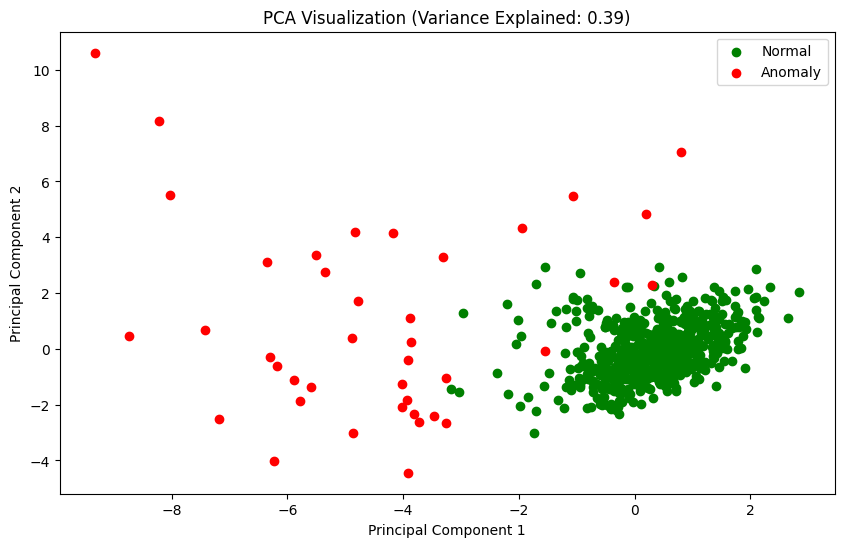

In [61]:
# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)
variance_explained = pca.explained_variance_ratio_.sum()
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[predictions == 1, 0], X_pca[predictions == 1, 1], c='green', label='Normal')
plt.scatter(X_pca[predictions == -1, 0], X_pca[predictions == -1, 1], c='red', label='Anomaly')
plt.title(f"PCA Visualization (Variance Explained: {variance_explained:.2f})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

- Here we load the trained Anomoly dataset file to train the decision tree and also to impute it.

In [62]:
# Save the preprocessed data with anomaly predictions
output_path = 'hemodat_with_anomalies.csv'
data_preprocessed.to_csv(output_path, index=False)

DecisionTree Model

- features defines a list of column names from the data_preprocessed DataFrame. These are the features (input variables) that will be used to train the model. Each of these features likely 
  corresponds to a measurement or attribute related to the medical condition classification, such as "Age", "ALB" (albumin), "ALP" (alkaline phosphatase), etc.

- X is the feature set, consisting of the selected columns from the dataset.
- y is the target variable (output), which indicates whether a person has a medical condition or is a blood donor. This is created by checking whether the 'Category' column is equal to '0=Blood 
  Donor'. If it's not equal, it will be classified as having a medical condition (1), otherwise as a blood donor (0). The .astype(int) ensures the values are integers (0 or 1).

- Decision Tree Classifier initializes maximum depth of 4 (max_depth=4). Limiting the depth prevents the model from overfitting by restricting the number of splits it can make.
- random_state=42 ensures that the classifier's behavior is deterministic and reproducible.
- .fit(X_train, y_train) trains the model on the training data (X_train for features and y_train for the target).

In [63]:
# Step 2: Explainable Model
features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

X = data_preprocessed[features]
y = (data_preprocessed['Category'] != '0=Blood Donor').astype(int)  # 1 for medical condition, 0 for blood donor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

print("Decision Tree Accuracy:", decision_tree.score(X_test, y_test))

Decision Tree Accuracy: 0.9024390243902439


In [64]:
# Evaluate the model
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        96
           1       1.00      0.56      0.71        27

    accuracy                           0.90       123
   macro avg       0.94      0.78      0.83       123
weighted avg       0.91      0.90      0.89       123



In [65]:
from sklearn.tree import _tree

def simplified_tree(decision_tree, feature_names):
    tree = decision_tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree.feature
    ]
    paths = []
    
    def recurse(node, path):
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree.threshold[node]
            recurse(tree.children_left[node], path + [f"({name} <= {threshold:.2f})"])
            recurse(tree.children_right[node], path + [f"({name} > {threshold:.2f})"])
        else:
            value = tree.value[node][0]
            prediction = value.argmax()
            path.append(f"Prediction: Class {prediction}")
            paths.append(" AND ".join(path))
    
    recurse(0, [])
    return "\n".join(paths)

# Generate the simplified decision tree text
print("Simplified Decision Tree:\n")
print(simplified_tree(decision_tree, X.columns))


Simplified Decision Tree:

(AST <= 54.15) AND (ALT <= 6.00) AND (CHE <= 8.07) AND Prediction: Class 1
(AST <= 54.15) AND (ALT <= 6.00) AND (CHE > 8.07) AND Prediction: Class 0
(AST <= 54.15) AND (ALT > 6.00) AND (PROT <= 50.50) AND Prediction: Class 1
(AST <= 54.15) AND (ALT > 6.00) AND (PROT > 50.50) AND (Age <= 31.00) AND Prediction: Class 1
(AST <= 54.15) AND (ALT > 6.00) AND (PROT > 50.50) AND (Age > 31.00) AND Prediction: Class 0
(AST > 54.15) AND (BIL <= 8.85) AND (ALT <= 28.60) AND Prediction: Class 1
(AST > 54.15) AND (BIL <= 8.85) AND (ALT > 28.60) AND (ALB <= 22.80) AND Prediction: Class 1
(AST > 54.15) AND (BIL <= 8.85) AND (ALT > 28.60) AND (ALB > 22.80) AND Prediction: Class 0
(AST > 54.15) AND (BIL > 8.85) AND (GGT <= 17.20) AND (CHE <= 11.30) AND Prediction: Class 0
(AST > 54.15) AND (BIL > 8.85) AND (GGT <= 17.20) AND (CHE > 11.30) AND Prediction: Class 1
(AST > 54.15) AND (BIL > 8.85) AND (GGT > 17.20) AND Prediction: Class 1


Here we visualize the Decision Tree Model which we trained using the imputed data.

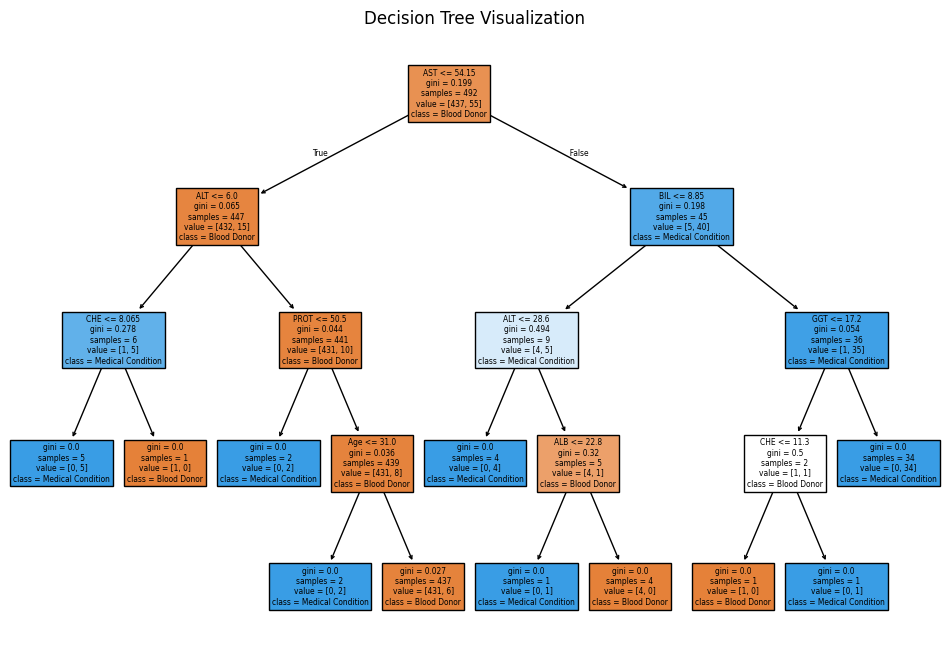

In [66]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=features, class_names=['Blood Donor', 'Medical Condition'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [67]:
print(data_imputed['Category'].value_counts())

Category
0.0    533
4.0     30
2.0     24
3.0     21
1.0      7
Name: count, dtype: int64


Xgboost Model Trained

- The hyperparameters to tune are defined in the param_grid dictionary:
    - n_estimators: The number of boosting rounds (models) to train.
    - max_depth: The maximum depth of each tree.
    - learning_rate: The step size at each iteration to update the model.

- This nested loop iterates through all possible combinations of the three hyperparameters from the param_grid.

- For each combination of hyperparameters, an XGBClassifier model is created with the specified values for n_estimators, max_depth, and learning_rate.

- The model is trained using X_train and y_train (the training data).

- The trained model is evaluated on the test set (X_test and y_test), and its accuracy score is stored in the variable score.

- If the current model's score is better than the previous best score (best_score), it updates best_score, stores the current model in best_model, and saves the corresponding hyperparameters in 
  best_params.

- After the grid search is completed, the code checks if a valid model was found. If no model was found, it prints an error message.

- If a best model is found, it prints the optimal hyperparameters (best_params) and the corresponding accuracy (best_score).

In [68]:
# Step 3: High-Performance Model
# Manual Grid Search for XGBoost
best_model = None
best_params = None
best_score = 0

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Iterate through the parameter grid
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            # Initialize the model with current parameters
            model = XGBClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                learning_rate=learning_rate,
                random_state=42,
                verbosity=0,
                eval_metric="logloss"
            )
            # Train the model
            model.fit(X_train, y_train)
            # Evaluate the model
            score = model.score(X_test, y_test)
            print(f"Params: n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate} -> Score: {score}")
            
            # Check if this is the best model so far
            if score > best_score:
                best_score = score
                best_model = model
                best_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'learning_rate': learning_rate
                }

# Output the best model and its parameters
if best_model is None:
    print("No valid XGBoost model found.")
else:
    print("\nBest Parameters:", best_params)
    print("Best Accuracy:", best_score)

Params: n_estimators=50, max_depth=3, learning_rate=0.01 -> Score: 0.7804878048780488
Params: n_estimators=50, max_depth=3, learning_rate=0.1 -> Score: 0.943089430894309
Params: n_estimators=50, max_depth=3, learning_rate=0.2 -> Score: 0.943089430894309
Params: n_estimators=50, max_depth=5, learning_rate=0.01 -> Score: 0.7804878048780488
Params: n_estimators=50, max_depth=5, learning_rate=0.1 -> Score: 0.926829268292683
Params: n_estimators=50, max_depth=5, learning_rate=0.2 -> Score: 0.9512195121951219
Params: n_estimators=50, max_depth=7, learning_rate=0.01 -> Score: 0.7804878048780488
Params: n_estimators=50, max_depth=7, learning_rate=0.1 -> Score: 0.9349593495934959
Params: n_estimators=50, max_depth=7, learning_rate=0.2 -> Score: 0.959349593495935
Params: n_estimators=100, max_depth=3, learning_rate=0.01 -> Score: 0.8617886178861789
Params: n_estimators=100, max_depth=3, learning_rate=0.1 -> Score: 0.943089430894309
Params: n_estimators=100, max_depth=3, learning_rate=0.2 -> Scor

- This function traces the path taken by a given sample through a decision tree and generates a string that describes each decision rule at every node. 

- The string explains which feature was used, the threshold value, and whether the sample's feature value was greater than or less than the threshold, providing insight into how the model made its decision.

In [69]:
# Trace the decision path for each test sample
def trace_decision_path(model, sample, feature_names):
    node_indicator = model.decision_path([sample])
    feature = model.tree_.feature
    threshold = model.tree_.threshold

    decision_path = []
    for node_id in node_indicator.indices:
        if feature[node_id] != -2:  # Not a leaf node
            feature_name = feature_names[feature[node_id]]
            threshold_value = threshold[node_id]
            comparison = "<=" if sample[feature[node_id]] <= threshold_value else ">"
            decision_path.append(f"{feature_name} {comparison} {threshold_value:.2f}")

    return " -> ".join(decision_path)

In [70]:
# Print decision paths for a few test samples
for i in range(5):  # Limit to 5 samples for clarity
    sample = X_test.iloc[i]
    path = trace_decision_path(decision_tree, sample.values, features)
    print(f"Sample {i+1} Decision Path: {path}")

Sample 1 Decision Path: AST <= 54.15 -> ALT > 6.00 -> PROT > 50.50 -> Age > 31.00
Sample 2 Decision Path: AST <= 54.15 -> ALT > 6.00 -> PROT > 50.50 -> Age > 31.00
Sample 3 Decision Path: AST <= 54.15 -> ALT > 6.00 -> PROT > 50.50 -> Age > 31.00
Sample 4 Decision Path: AST > 54.15 -> BIL > 8.85 -> GGT > 17.20
Sample 5 Decision Path: AST <= 54.15 -> ALT > 6.00 -> PROT > 50.50 -> Age > 31.00


c:\Users\radadiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\radadiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\radadiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\radadiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\radadiya\AppData\Local\Programs\Python\Python312\Lib\si

SHAP Explanation:

- best_model: This is the model that has been trained and selected as the best model to explain.

- Here, a SHAP explainer object is created using shap.TreeExplainer. This is designed for tree-based models (like decision trees, random forests, or XGBoost). The best_model is passed to the 
  explainer.

- shap_values computes the SHAP values for the test set X_test (which is a DataFrame). SHAP values represent the contribution of each feature to the model's prediction for each sample.

- The expected_value can either be a scalar or a list/array (for multi-class classification). This checks if it is a list/array and extracts the expected value for the first class (class 0), 
  which is used later for comparison in the SHAP waterfall plots.

- if shap_values is a list (which would be the case for multi-class or multi-output models), this line extracts the SHAP values for the first output class. Otherwise, it assumes a single-output 
  model and uses the SHAP values directly.

- For each sample, a SHAP explanation is created using:
  - values: SHAP values for the current sample (shap_values_class[sample_index]).
  - base_values: The expected value (baseline) for the first class.
  - data: The actual features of the current test sample (X_test.iloc[sample_index]).
  - feature_names: List of feature names for the sample.

Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values: (123, 11)
Type of explainer.expected_value: <class 'numpy.float32'>
Value of explainer.expected_value: -2.430724620819092
Displaying waterfall plot for sample 1/5


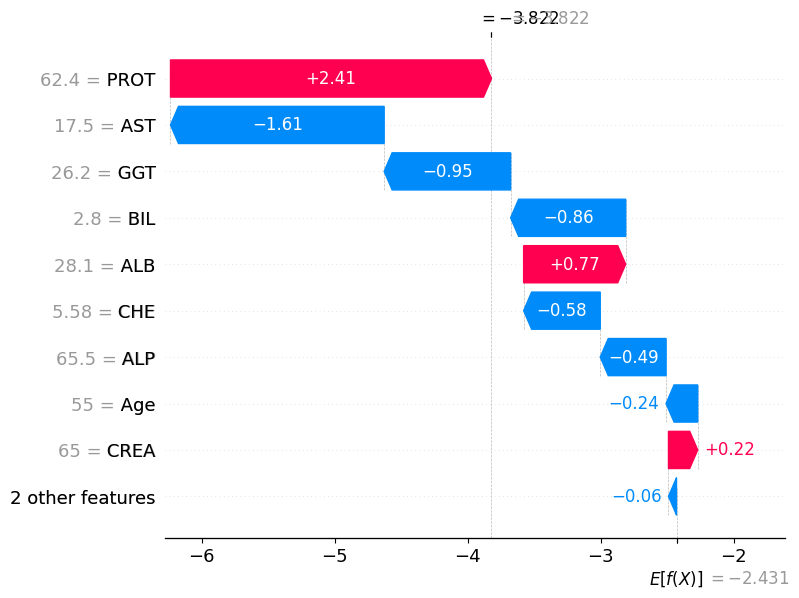

<Figure size 640x480 with 0 Axes>

Displaying waterfall plot for sample 2/5


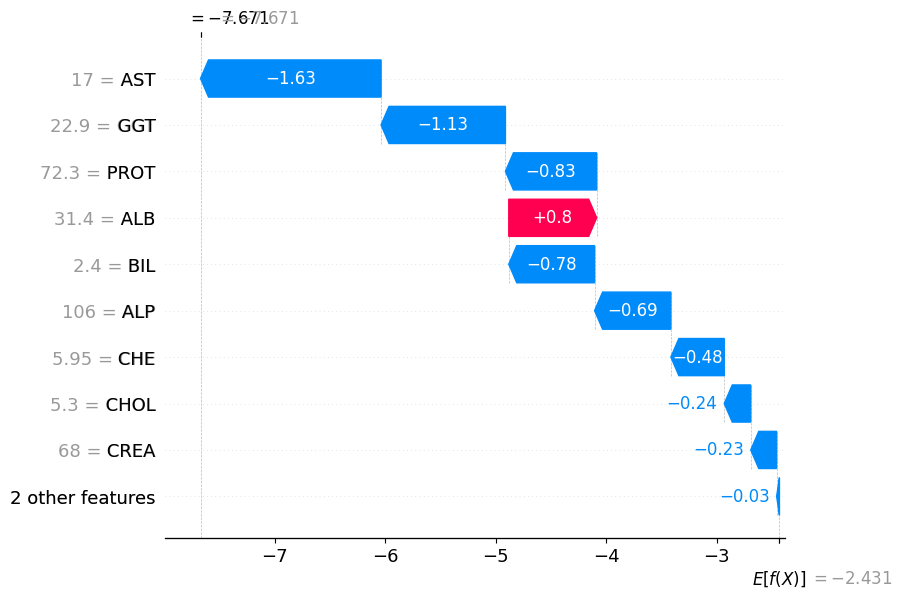

<Figure size 640x480 with 0 Axes>

Displaying waterfall plot for sample 3/5


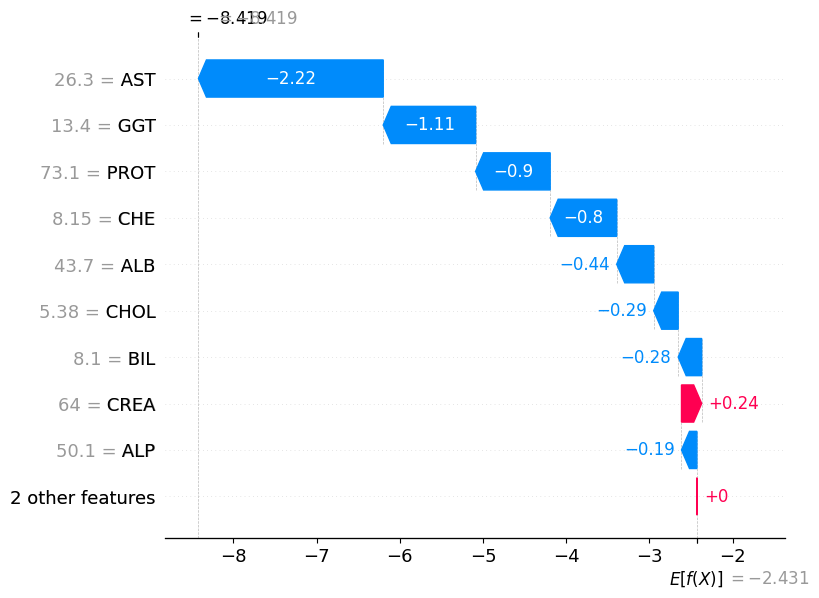

<Figure size 640x480 with 0 Axes>

Displaying waterfall plot for sample 4/5


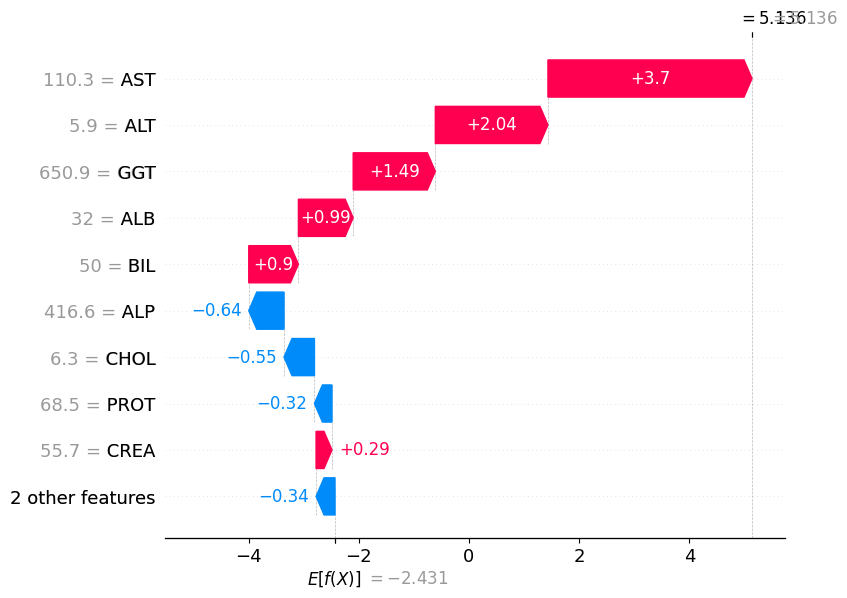

<Figure size 640x480 with 0 Axes>

Displaying waterfall plot for sample 5/5


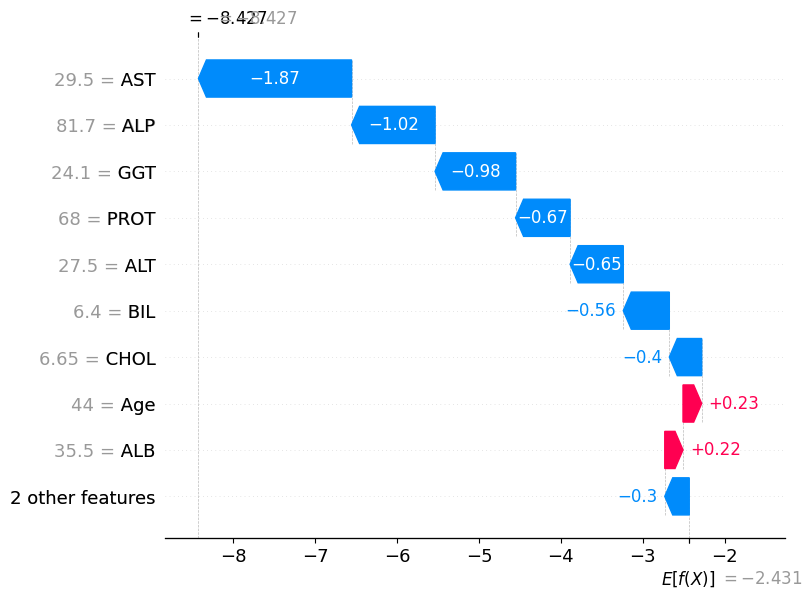

<Figure size 640x480 with 0 Axes>

In [71]:
# SHAP Explanations
if best_model is not None:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

    # Debugging: Log shapes and values for shap_values and expected_value
    print(f"Type of shap_values: {type(shap_values)}")
    print(f"Shape of shap_values: {np.shape(shap_values)}")
    print(f"Type of explainer.expected_value: {type(explainer.expected_value)}")
    print(f"Value of explainer.expected_value: {explainer.expected_value}")

    # Handle the expected value appropriately
    expected_value = explainer.expected_value
    if isinstance(expected_value, (list, np.ndarray)):
        expected_value_for_class_0 = expected_value[0]  # Expected value for class 0
    else:
        expected_value_for_class_0 = expected_value  # Use scalar directly if it's not array-like

    # Fix for multi-output models or incorrect SHAP value shapes
    if isinstance(shap_values, list):
        shap_values_class = shap_values[0]  # Use the SHAP values for the first output class
    else:
        shap_values_class = shap_values  # Assume single-output model

    # Display SHAP waterfall plots for 5 different samples
    for i in range(5):
        sample_index = i  # Select the ith sample from X_test
        print(f"Displaying waterfall plot for sample {sample_index + 1}/5")

        # Ensure compatibility with shap.Explanation
        shap_explanation = shap.Explanation(
            values=shap_values_class[sample_index],  # SHAP values for the ith sample
            base_values=expected_value_for_class_0,  # Adapted expected value
            data=X_test.iloc[sample_index],  # Data for the ith sample
            feature_names=X_test.columns.tolist()  # Feature names
        )

        # Plot the waterfall
        shap.waterfall_plot(shap_explanation)
        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()

Here we Show the result of Global Explanation.

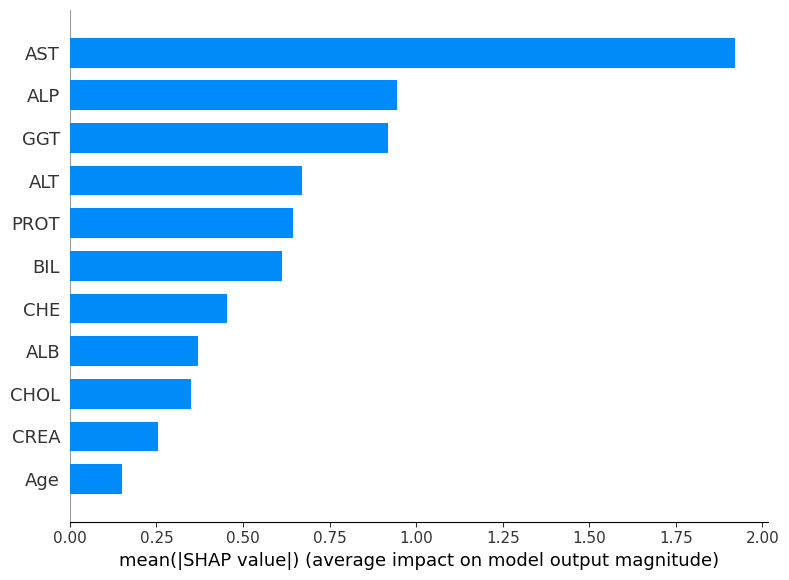

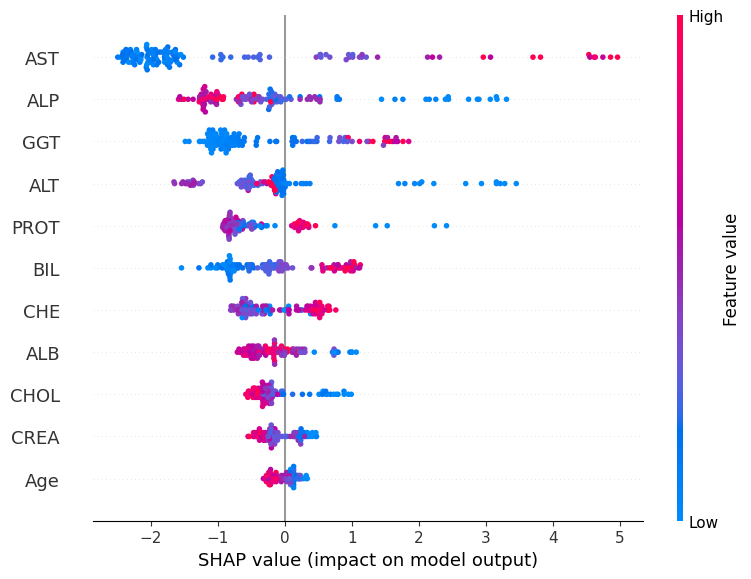

<Figure size 640x480 with 0 Axes>

In [72]:
# Global Explanation (Summary Plot) with adjusted size for clarity
plt.figure(figsize=(50,10))  # Increase the figure size to make it clearer
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [73]:
print("Decision Tree Accuracy:", decision_tree.score(X_test, y_test))
print("Best Accuracy:", best_score)

Decision Tree Accuracy: 0.9024390243902439
Best Accuracy: 0.967479674796748


Combined Model Of the above three model:

- The __init__ method initializes the class. Three different models are instantiated within this method:
    - XGBClassifier: A gradient boosting model used for classification tasks.
    - DecisionTreeClassifier: A decision tree classifier with a maximum depth of 5 to limit model complexity and ensure explainability.
    - IsolationForest: An anomaly detection algorithm that flags unusual data points. The contamination=0.05 argument specifies that the model assumes 5% of the data could be anomalous.

- The fit method trains all three models:
    - XGBoost and Decision Tree are trained on the feature matrix X_train and the target labels y_train.
    - IsolationForest is trained only on X_train since it performs unsupervised anomaly detection.

- The predict method makes predictions using all three models:
    - Anomaly detection is performed using self.anomaly_detector.predict(X), where the output is 1 (normal) or -1 (anomaly).
    - XGBoost predictions are generated by calling self.xgb_model.predict(X).
    - Decision Tree predictions are generated similarly using self.dt_model.predict(X).

- The explain method provides explainability for the XGBoost model using SHAP values, which show the impact of each feature on the model's predictions.
    - SHAP TreeExplainer is used to generate SHAP values, which are computed using explainer.shap_values(X).
    - The SHAP values for each feature in the data are used to understand how much each feature contributed to the prediction.
    - The method ensures that if shap_values is not a list (i.e., for binary classification), it converts it into a list for compatibility.
    - The method generates SHAP waterfall plots for the first few samples (up to 5), displaying the contribution of each feature to the prediction for that sample. These plots help users  
      understand the decision-making process of the model.

In [74]:
# Step 4: Combined Model

class CombinedModel:
    def __init__(self):
        self.xgb_model = XGBClassifier()
        self.dt_model = DecisionTreeClassifier(max_depth=5)  # Limiting depth for explainability
        self.anomaly_detector = IsolationForest(contamination=0.05)  # 5% anomaly threshold

    def fit(self, X_train, y_train):
        # Fit all models
        self.xgb_model.fit(X_train, y_train)
        self.dt_model.fit(X_train, y_train)
        self.anomaly_detector.fit(X_train)

    def predict(self, X):
        # Anomaly detection
        is_anomaly = self.anomaly_detector.predict(X)

        # XGBoost prediction
        xgb_preds = self.xgb_model.predict(X)

        # Decision Tree prediction
        dt_preds = self.dt_model.predict(X)

        # Combine predictions and anomaly flags
        combined_output = {
            "xgb_prediction": xgb_preds,
            "dt_prediction": dt_preds,
            "is_anomaly": is_anomaly,
        }
        return combined_output

    def explain(self, X):
        # Generate SHAP explanations using XGBoost model
        explainer = shap.TreeExplainer(self.xgb_model)
        shap_values = explainer.shap_values(X)

        # Ensure compatibility with SHAP Explanation
        if not isinstance(shap_values, list):
            shap_values = [shap_values]

        # Display explanations for the first few samples
        for i in range(min(5, len(X))):
            print(f"Displaying SHAP explanation for sample {i + 1}/5")
            shap_explanation = shap.Explanation(
                values=shap_values[0][i],  # SHAP values for the ith sample (class 0)
                base_values=explainer.expected_value if np.isscalar(explainer.expected_value) else explainer.expected_value[0],
                data=X.iloc[i],  # Data for the ith sample
                feature_names=X.columns.tolist()
            )
            shap.waterfall_plot(shap_explanation)
            plt.tight_layout()
            plt.show()

Combined Model Predictions: {'xgb_prediction': array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 'dt_prediction': array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 'is_anomaly': array([ 1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1

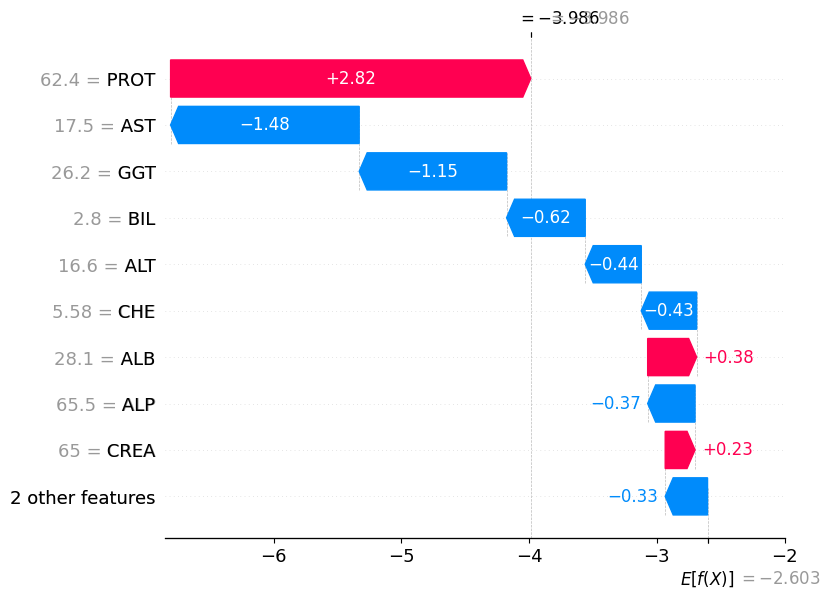

<Figure size 640x480 with 0 Axes>

Displaying SHAP explanation for sample 2/5


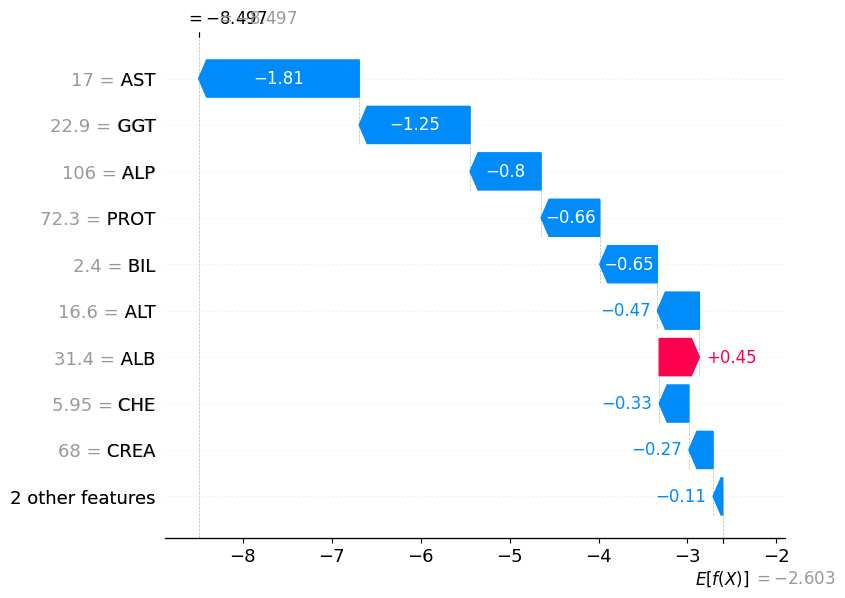

<Figure size 640x480 with 0 Axes>

Displaying SHAP explanation for sample 3/5


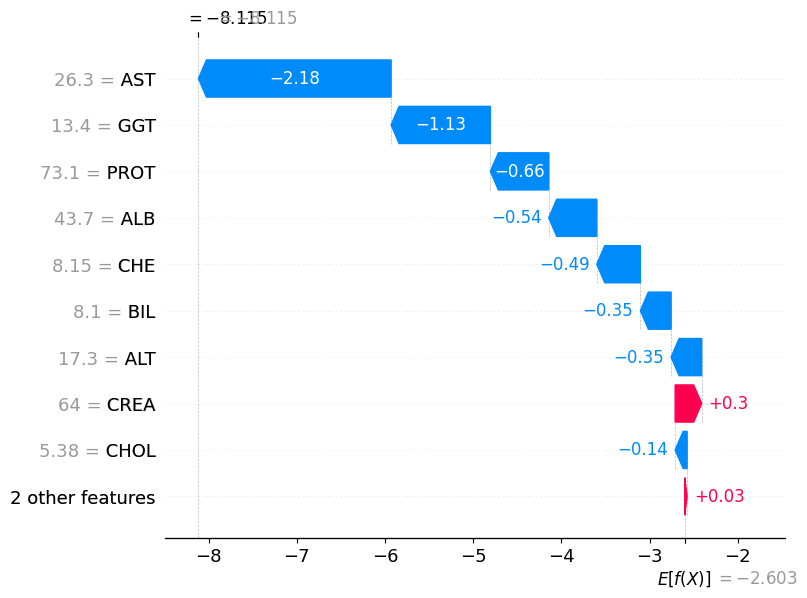

<Figure size 640x480 with 0 Axes>

Displaying SHAP explanation for sample 4/5


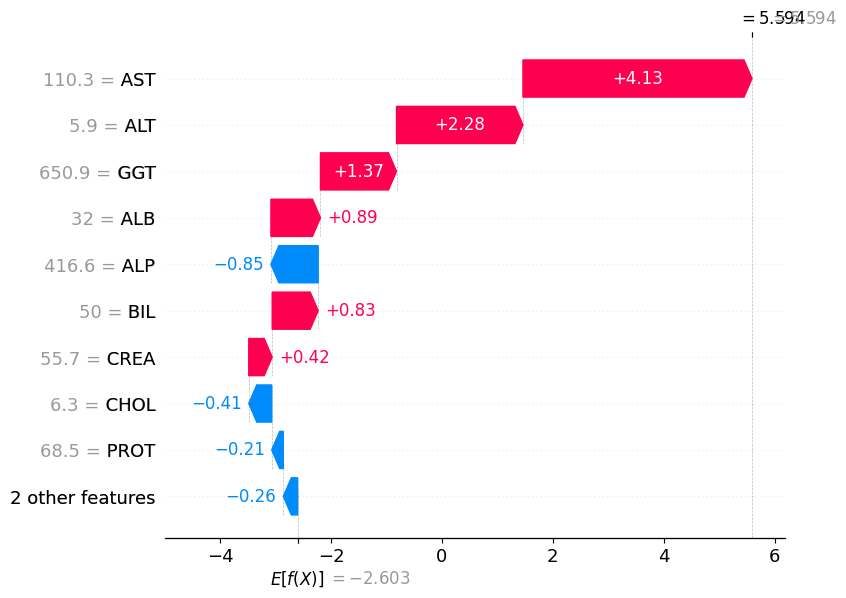

<Figure size 640x480 with 0 Axes>

Displaying SHAP explanation for sample 5/5


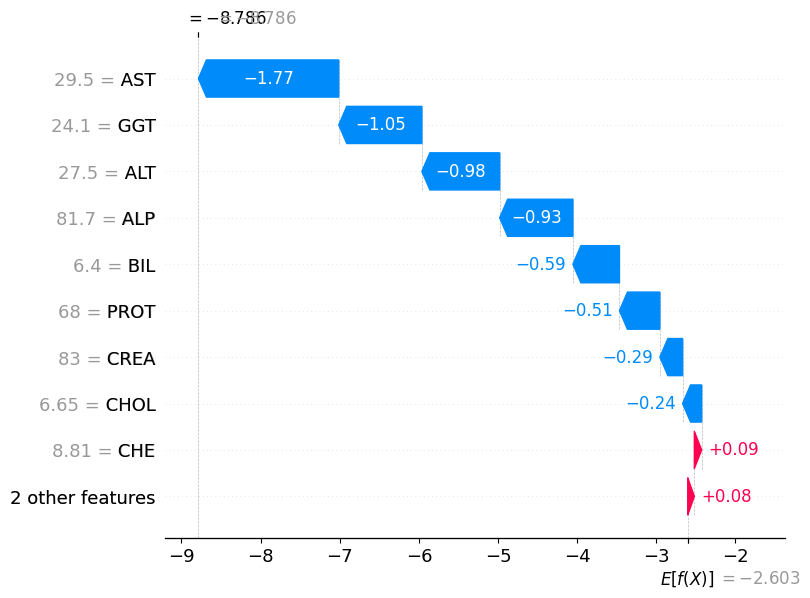

<Figure size 640x480 with 0 Axes>

Number of anomalies detected: 10


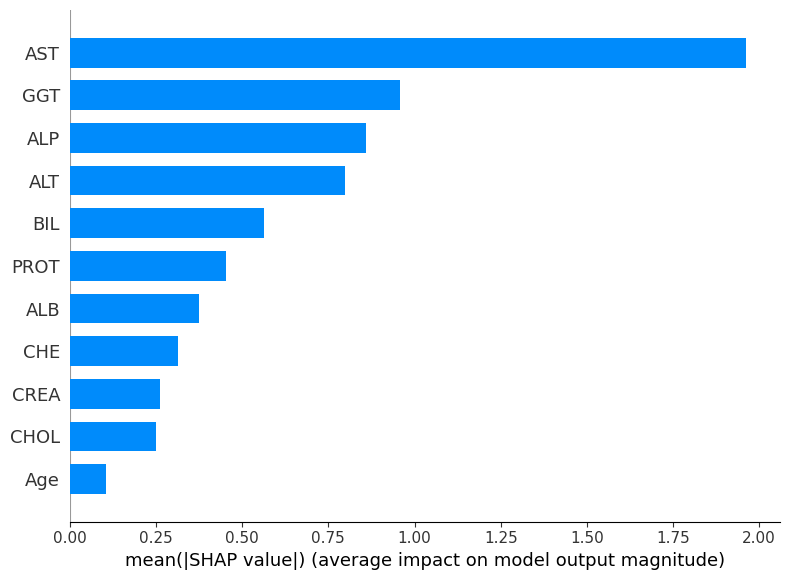

In [75]:
# Example Usage
if __name__ == "__main__":
    # Assuming X_train, y_train, and X_test are predefined

    combined_model = CombinedModel()

    # Fit the model
    combined_model.fit(X_train, y_train)

    # Predict using the combined model
    predictions = combined_model.predict(X_test)
    print("Combined Model Predictions:", predictions)

    # Explain the model predictions
    combined_model.explain(X_test)

    # Evaluate anomaly detection
    anomalies = X_test[predictions["is_anomaly"] == -1]  # IsolationForest flags anomalies as -1
    print(f"Number of anomalies detected: {len(anomalies)}")

    # Global SHAP explanation for XGBoost
    shap.summary_plot(
        shap.TreeExplainer(combined_model.xgb_model).shap_values(X_test), X_test, plot_type="bar"
    )
